Que.3 -

Prepare a model for glass classification using KNN, SVM and Naive Bayes.
Also calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score.
Data Description:
RI : refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
AI: Aluminum
Si: Silicon
K:Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

Dataset : Glass.csv


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("glass.csv")

# EDA

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


# Data cleaning

In [8]:
df.drop('RI',axis=1,inplace=True)
df.drop('Si',axis=1,inplace=True)
df.drop('K',axis=1,inplace=True)
df.drop('Ca',axis=1,inplace=True)
df.drop('Fe',axis=1,inplace=True)
        

In [9]:
df.corr()

,Na,Mg,Al,Ba,Type
Na,1.000000,-0.273732,0.156794,0.326603,0.502898
Mg,-0.273732,1.000000,-0.481799,-0.492262,-0.744993
Al,0.156794,-0.481799,1.000000,0.479404,0.598829
Ba,0.326603,-0.492262,0.479404,1.000000,0.575161
Type,0.502898,-0.744993,0.598829,0.575161,1.000000


## checking for null values

In [10]:
df.isna().sum()

Na      0
Mg      0
Al      0
Ba      0
Type    0
dtype: int64

#### Since there are no null values we, dont have to do any changes

# Data Splitting

In [11]:
x = df.drop('Type',axis=1)
y = df['Type']

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=123456)


# Model building

In [13]:
from sklearn.neighbors import KNeighborsClassifier
def create_KNN():
    model = KNeighborsClassifier()
    model.fit(x_train,y_train)
    return model

In [14]:
from sklearn.svm import SVC
def create_SVM():
    model = SVC()
    model.fit(x_train,y_train)
    return model

In [15]:
from sklearn.naive_bayes import GaussianNB
def create_NB():
    model = GaussianNB()
    model.fit(x_train,y_train)
    return model

In [16]:
models = []
models.append({'name':'KNN','model':create_KNN()})
models.append({'name':'SVM','model':create_SVM()})
models.append({'name':'NB','model':create_NB()})

# Model Evaluation

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def model_evaluation(model):
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='macro')
    recall = recall_score(y_test,y_pred,average='macro')
    f1 = f1_score(y_test,y_pred,average='macro')
    cm = confusion_matrix(y_test,y_pred)

    return accuracy,precision,recall,f1,cm

In [18]:
for i in models:
    accuracy,precision,recall,f1,cm = model_evaluation(i['model'])
    i['accuracy'] = accuracy
    i['precision'] = precision
    i['recall'] = recall
    i['f1'] = f1

In [19]:
df_evaluation_report = pd.DataFrame(models,columns=["name","accuracy","precision","recall","f1"])
df_evaluation_report

,name,accuracy,precision,recall,f1
0,KNN,0.604651,0.622222,0.575595,0.541132
1,SVM,0.302326,0.160714,0.258929,0.173280
2,NB,0.395349,0.440621,0.485714,0.358500


In [20]:
def visualize_model(info):
    
    y_pred = info['model'].predict(x_test)
    plt.scatter(x_test['Mg'][y_pred==1], x_test['Al'][y_pred==1], color='green')
    plt.scatter(x_test['Mg'][y_pred==2], x_test['Al'][y_pred==2], color='red')
    plt.scatter(x_test['Mg'][y_pred==3], x_test['Al'][y_pred==3], color='blue')
    plt.scatter(x_test['Mg'][y_pred==5], x_test['Al'][y_pred==5], color='yellow')
    plt.scatter(x_test['Mg'][y_pred==6], x_test['Al'][y_pred==6], color='orange')
    plt.scatter(x_test['Mg'][y_pred==7], x_test['Al'][y_pred==7], color='black')
    plt.xlabel('mg')
    plt.ylabel('Al')
    plt.legend()    

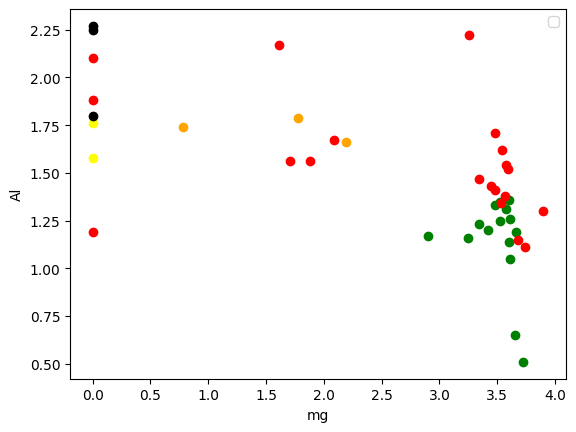

In [21]:
visualize_model(models[0])

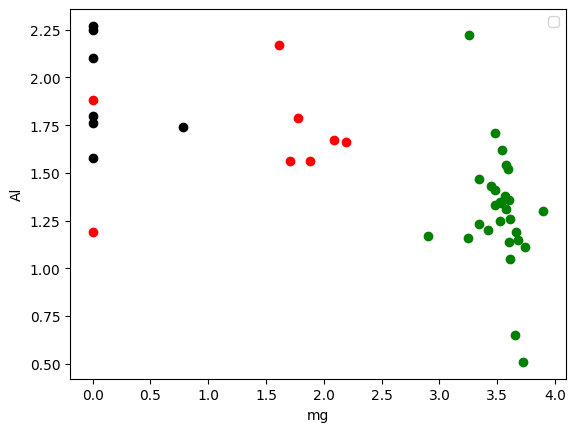

In [22]:
visualize_model(models[1])

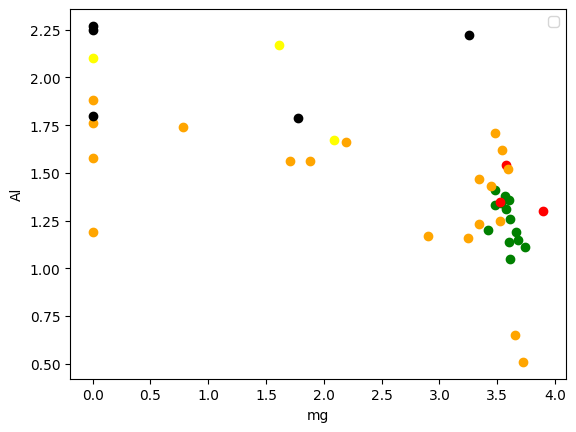

In [23]:
visualize_model(models[2])